In [23]:
import matplotlib.pyplot as plt
import sqlite3

# Connect to the database
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Ensure the sales table exists (and create if necessary)
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    date TEXT NOT NULL,
    customer_name TEXT NOT NULL,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
)
""")
conn.commit()

# Insert sample data (if table is empty)
cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    sample_data = [
        ("2025-06-01", "Bob", "Phone", 2, 500.00),
        ("2025-06-02", "Alice", "Laptop", 1, 1200.00),
        ("2025-06-03", "Charlie", "Tablet", 3, 300.00)
    ]
    cursor.executemany("""
    INSERT INTO sales (date, customer_name, product, quantity, price)
    VALUES (?, ?, ?, ?, ?)
    """, sample_data)
    conn.commit()

# Run the query
cursor.execute("SELECT * FROM sales")
rows = cursor.fetchall()

# Print debug information
print("Total rows fetched:", len(rows))
for row in rows:
    print(row)




Total rows fetched: 3
(1, '2025-06-01', 'Bob', 'Phone', 2, 500.0)
(2, '2025-06-02', 'Alice', 'Laptop', 1, 1200.0)
(3, '2025-06-03', 'Charlie', 'Tablet', 3, 300.0)


In [19]:
product_name = "Laptop"
cursor.execute("SELECT * FROM sales WHERE product = ?", (product_name,))
rows = cursor.fetchall()

for row in rows:
    print(row)

(2, '2025-06-02', 'Alice', 'Laptop', 1, 1200.0)


In [20]:
cursor.execute("""
SELECT product, SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
""")

results = cursor.fetchall()
for row in results:
    print(row)

('Laptop', 1200.0)
('Phone', 1000.0)
('Tablet', 900.0)


Total Revenue Per Product:
Product: Laptop, Revenue: ₹1200.00
Product: Phone, Revenue: ₹1000.00
Product: Tablet, Revenue: ₹900.00


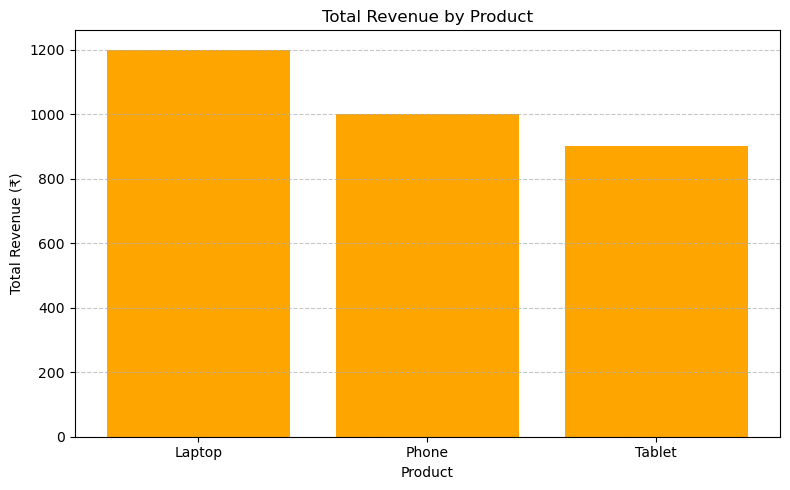

In [24]:
# Query: Total revenue per product
cursor.execute("""
SELECT product, SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
""")
rows = cursor.fetchall()

# Display output using print
print("Total Revenue Per Product:")
for row in rows:
    print(f"Product: {row[0]}, Revenue: ₹{row[1]:.2f}")

# Prepare data for matplotlib bar chart
products = [row[0] for row in rows]
revenues = [row[1] for row in rows]

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(products, revenues, color='orange')
plt.xlabel("Product")
plt.ylabel("Total Revenue (₹)")
plt.title("Total Revenue by Product")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Close connection
conn.close()
